Source
------
http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
    
Statement
---------
Exercise

On the diabetes dataset, find the optimal regularization parameter alpha.

Bonus: How much can you trust the selection of alpha?


    from sklearn import datasets
    from sklearn.linear_model import LassoCV
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import KFold
    from sklearn.model_selection import GridSearchCV
    
    diabetes = datasets.load_diabetes()

In [1]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

diabetes = datasets.load_diabetes()

/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
X = diabetes.data
y = diabetes.target

k = int(0.1 * len(diabetes.data))

print(len(diabetes.data), k)

442 44


In [9]:
# This model is cross validated by default
lassocv = LassoCV()
lassocv.fit(X[:-k], y[:-k])
lassocv.score(X[-k:], y[-k:])

0.6790157799563594

In [4]:
alphas = np.logspace(-10, 10, 100)
lasso = Lasso()
clf = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas))
clf.fit(X[:-k], y[:-k])
clf.score(X[-k:], y[-k:])

/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cduquesne/code/perso/data-science-exe

/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6796014866397124

In [12]:
clf.cv_results_

/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/cduquesne/code/perso/data-science-exercises/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set retu

{'mean_fit_time': array([0.00278783, 0.00243664, 0.00235113, 0.00217342, 0.00209618,
        0.00201845, 0.00193977, 0.00186769, 0.00180078, 0.00170247,
        0.00163579, 0.00155576, 0.00148098, 0.00133483, 0.0010678 ,
        0.00084901, 0.00079536, 0.00064301, 0.00047549, 0.0004793 ,
        0.00049853, 0.00047628, 0.0004731 , 0.00047819, 0.00047358,
        0.00055003, 0.00072869, 0.00049456, 0.00055329, 0.0005312 ]),
 'mean_score_time': array([0.00034205, 0.00028872, 0.0002857 , 0.00027974, 0.00026528,
        0.00026218, 0.00026313, 0.00026592, 0.00026099, 0.00026131,
        0.00026941, 0.00026139, 0.00026822, 0.00027092, 0.000271  ,
        0.00026361, 0.00025996, 0.00025876, 0.00026147, 0.000259  ,
        0.00026655, 0.00026115, 0.00026035, 0.00026099, 0.00025495,
        0.00026345, 0.00032353, 0.00028642, 0.00033045, 0.00029723]),
 'mean_test_score': array([0.34908311, 0.34919799, 0.34934947, 0.34954908, 0.34981211,
        0.35015826, 0.35061336, 0.35121121, 0.35199462, 0

Correction
----------

Automatically created module for IPython interactive environment
Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


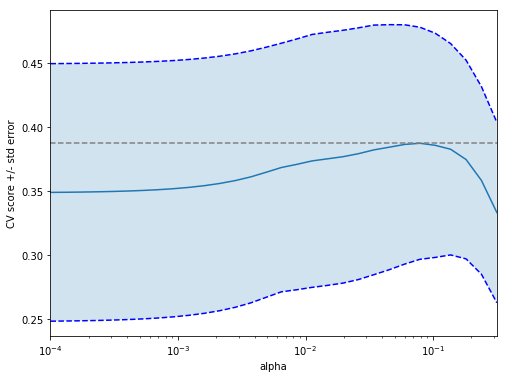

In [16]:
from __future__ import print_function
print(__doc__)

% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()


Enhancements
------------

Automatically created module for IPython interactive environment


(0.0001, 10.0)

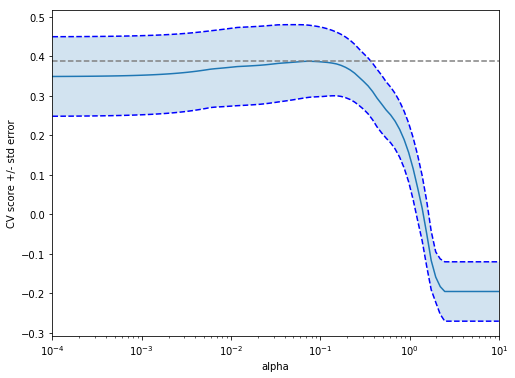

In [21]:
from __future__ import print_function
print(__doc__)

% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
# Why 150? There are 442 data points. Why not 90% of the data like in the other exercises?
X = diabetes.data[:150]
y = diabetes.target[:150]

# The correction had 30 values of alphas between 10⁻⁴ and 10⁻⁰⸳⁵
# Let's try 100 values between 10⁻⁴ and 10
alphas = np.logspace(-4, 1, 100)

# pretty much the same, but we don't force 3 folds because it's the default value
# also we let the model refit because it should not change the result
tuned_parameters = [{'alpha': alphas}]
clf = GridSearchCV(lasso, tuned_parameters)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])



In [22]:
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

[fold 0] alpha: 0.09545, score: 0.53720
[fold 1] alpha: 0.05337, score: 0.15959
[fold 2] alpha: 0.09545, score: 0.44716


In [23]:
# ok, same conclusion